# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
#query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [61]:
#Create lists to hold data for scatterplots
temp = []
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
cit = []
country = []

for city in cities: 
    try:
        query_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
        response = requests.get(query_url).json()
        cit.append(response['name']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Retrieving Results for {city}.")
   
    except (KeyError, IndexError):
        print("Skipping")

Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
len(cit)

562

In [63]:
#Creates dictionary to store weather data.
weather_dict = {
    "City": cit,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature (F)": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed (mph)": wind
    
}

#Creates data frame from dictionary of weather data
weather_data = pd.DataFrame(weather_dict)

#Creates csv of the data
weather_data.to_csv('Output/weatherdata.csv', index=False)  

#Prints data frame
weather_data

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,Komsomolets,53.7453,62.0708,16.63,94,100,3.76
1,Ostrovnoy,68.0531,39.5131,18.79,83,100,10.51
2,Barrow,71.2906,-156.7887,-11.20,92,1,3.31
3,Tasiilaq,65.6145,-37.6368,6.80,56,20,8.05
4,Punta Arenas,-53.1500,-70.9167,53.60,58,75,19.57
...,...,...,...,...,...,...,...
557,Vitim,59.4511,112.5578,17.38,97,100,1.28
558,Vernon,50.2581,-119.2691,46.00,70,48,4.61
559,Tshikapa,-6.4167,20.8000,69.30,95,24,1.81
560,Belyy Yar,53.6039,91.3903,21.20,86,0,8.95


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
# For my own info, show in a dataframe cities with humidity > 100.
weather_data.loc[weather_data['Humidity'] > 100]

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph)


In [65]:
# Get the indices of cities that have humidity over 100%.

indexNames = weather_data[weather_data['Humidity'] > 100].index

indexNames



Int64Index([], dtype='int64')

In [66]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_weather_data = weather_data.drop(indexNames , inplace=False)
clean_weather_data



,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,Komsomolets,53.7453,62.0708,16.63,94,100,3.76
1,Ostrovnoy,68.0531,39.5131,18.79,83,100,10.51
2,Barrow,71.2906,-156.7887,-11.20,92,1,3.31
3,Tasiilaq,65.6145,-37.6368,6.80,56,20,8.05
4,Punta Arenas,-53.1500,-70.9167,53.60,58,75,19.57
...,...,...,...,...,...,...,...
557,Vitim,59.4511,112.5578,17.38,97,100,1.28
558,Vernon,50.2581,-119.2691,46.00,70,48,4.61
559,Tshikapa,-6.4167,20.8000,69.30,95,24,1.81
560,Belyy Yar,53.6039,91.3903,21.20,86,0,8.95


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot shows the city's latitude compared to its maximum temperature. Based on this data set, higher temperatures seem to correlate with latitudes that approach 0 (the equator). 

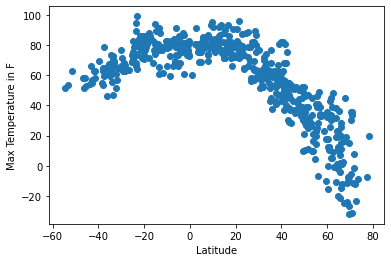

In [67]:
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature (F)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
plt.savefig('Output/LatvTemp.png')
plt.show()

## Latitude vs. Humidity Plot
This plot shows a city's latutude compared to its percentage humidity. It appears there is no significant correlation between higher humidities and proximity to the equator, however, cities just above the equator (around a latitude of 20) seem to have both lower and higher humidity. Lower humidty isn't seen elsewhere so could be something to look into.

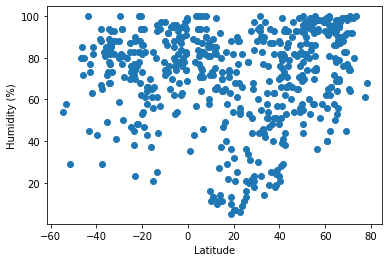

In [68]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Output/LatvHum.png')
plt.show()

## Latitude vs. Cloudiness Plot
This chart compares the latitude of a city to its percent cloudiness. It shows that low cloudiness doesn't appear as frequently closer to the equator (-20 to 20 latitude) whereas that same location seems to have a high cloudiness. 

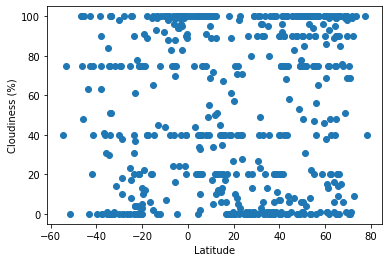

In [69]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Output/LatvCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot
This chart compares a city's latitude to its wind speed in mph. Overall, it appears that regardless of latitude, wind speeds tend to concentrate around 10 mph or lower. In this sample data set, at a latitude of 60 there are some higher wind speeds which appear to be outliers and could be worth further looking into.

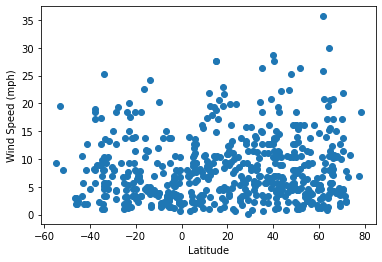

In [70]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Output/LatvWind.png')
plt.show()

## Linear Regression

In [71]:
#Create Northern Hempsphere DF
northern_df = weather_data.loc[weather_data['Latitude'] >= 0]

#Create Southern Hempsphere DF
southern_df = weather_data.loc[weather_data['Latitude'] < 0]

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
4,Punta Arenas,-53.1500,-70.9167,53.60,58,75,19.57
5,Oranjemund,-28.5500,16.4333,62.62,81,0,2.75
7,Pompéu,-19.2244,-44.9353,81.90,47,91,2.28
8,Plettenberg Bay,-34.0527,23.3716,66.70,84,100,5.08
11,East London,-33.0153,27.9116,69.80,88,0,9.22
...,...,...,...,...,...,...,...
550,Panguna,-6.3164,155.4848,68.40,96,100,3.04
551,São João da Barra,-21.6403,-41.0511,86.00,48,0,13.80
555,Uvinza,-5.1036,30.3911,66.11,96,100,3.62
559,Tshikapa,-6.4167,20.8000,69.30,95,24,1.81


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.7875885739328512


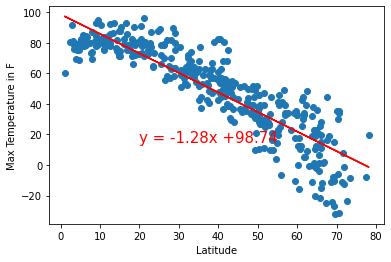

In [72]:
 # Perform a linear regression on temperature vs. latitude #Source API Day 2 Activity 7
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvTempRegN.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.48x +82.9
The r-value is: 0.4066862135592204


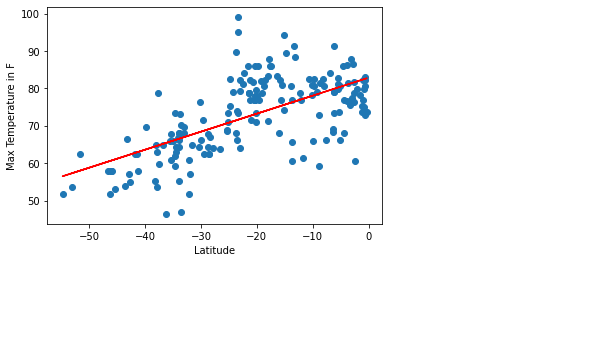

In [73]:
 # Perform a linear regression on temperature vs. latitude #Source API Day 2 Activity 7
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvTempRegS.png')
plt.show()

####  Northern/Southern Hemisphere - Max Temp vs. Latitude Linear Regression Analysis

Based on the graphs aboce, there seems to be a correlation between  latitude approaching 0 and higher temp, although based on the data sampled, this r value is stronger for the northern hempshphere. There are also more data points in that hempshere.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.35x +55.72
The r-value is: 0.08053974372300321


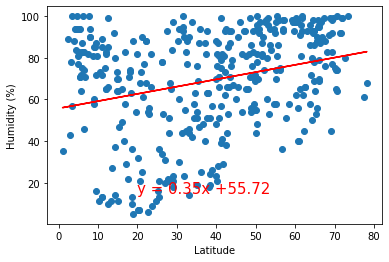

In [81]:
 # Perform a linear regression on humidity vs. latitude #Source API Day 2 Activity 7
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvHumRegN.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.18x +79.75
The r-value is: 0.02192085514948531


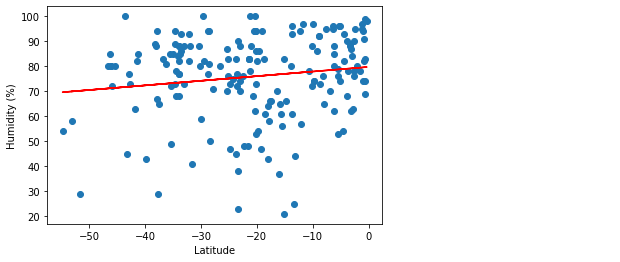

In [82]:
 # Perform a linear regression on humidity vs. latitude #Source API Day 2 Activity 7
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvHumRegS.png')
plt.show()

####  Northern/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Analysis

Based on the graphs aboce, there seems to be a slight correlation between humidty and lattude, which increases as the cities move farther up in latitude. The r value is low so more analysis would be needed, perhaps including other factors like altitude, etc., in order to make any conclusions. However, preliminary analysis indicates that cities lower in latitude are less humid.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.28x +39.98
The r-value is: 0.021055438557234143


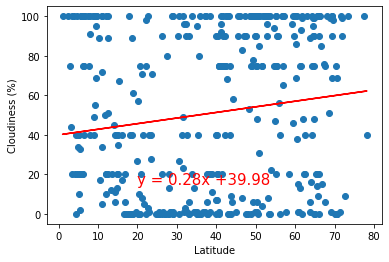

In [83]:
 # Perform a linear regression on cloudiness vs. latitude #Source API Day 2 Activity 7
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvCloudRegN.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.87x +72.16
The r-value is: 0.09128382370448164


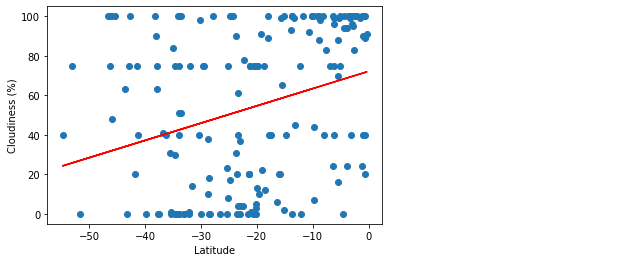

In [84]:
 # Perform a linear regression on cloudiness vs. latitude #Source API Day 2 Activity 7
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvCloudRegS.png')
plt.show()

####  Northern/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Analysis
This data indicates that as citiies move north in latitude, there is an increase in cloudiness. However, the r value is low in both graphs so this warrants further analysis.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.0x +8.78
The r-value is: 2.910479818644351e-05


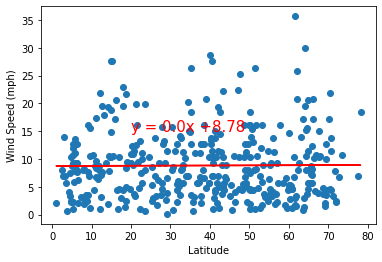

In [85]:
 # Perform a linear regression on wind speed (mph) vs. latitude #Source API Day 2 Activity 7
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvWindRegN.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x +5.82
The r-value is: 0.029242896896384245


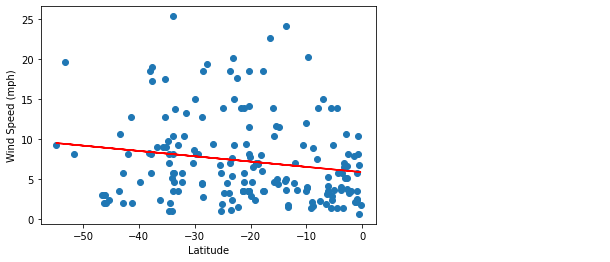

In [86]:
 # Perform a linear regression on wind speed (mph) vs. latitude #Source API Day 2 Activity 7
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('Output/LatvWindRegS.png')
plt.show()

####  Northern/Southern Hemisphere - Wind Speed (mpg) vs. Latitude Linear Regression
Based on this data, the graphs indicate that wind speed tends to slightly decrease as cities in the souther hemisphere move closer to the equator. However, the r value is low so more analysis is needed. The r value is higher for the northern hemisphere, which indicates no correlations between wind speed and latitude. More analysis is needed in this area.